# Lab 4

## Task 1

Write down the differential equation describing the system of chemical equations (assuming a volume of 1).

1. ∅ → X at a rate 1
2. X → Y at rate 2
3. 2 X + Y → 3 X at rate 0.02
4. X → ∅ at rate 0.04

__Differential Equations for X and Y:__
<br>
<br>
$\frac{d[X]}{dt} = k_1[\emptyset] - k_2[X] + k_3[X]^2[Y] - k_4[X]$
<br>
<br>
Substituting values of $k_1, k_2, k_3$ and $k_4$:
<br>
<br>
$\frac{d[X]}{dt} = 1 - 2 [X] + 0.02 [X]^2 [Y] - 0.04 [X]$
<br>
<br>
<br>
<br>
$\frac{d[Y]}{dt} = k_2[X] - k_3[X]^2[Y]$
<br>
<br>
Substituting values of $k_2$ and $k_3$:
<br>
<br>
$\frac{d[Y]}{dt} =2[X] - 0.02[X]^2 [Y]$

## Task 2

Use a package to solve the differential equation for 500 time units starting from X(0)=Y(0)=0.

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import random

Text(0, 0.5, 'Concentration Y')

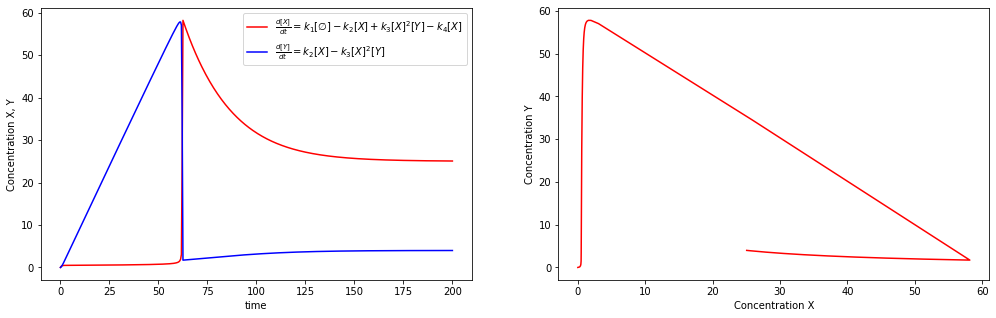

In [7]:
# Function that returns dX/dt and dY/dt
def differentials(array,t, phi, k1, k2, k3, k4):
    x, y = array[0], array[1]
    dxdt = k1*phi - k2*x + k3*x*x*y - k4*x
    dydt = k2*x - k3*x*x*y
    return [dxdt,dydt]

# Initial condition X(0) = 0, Y(0) = 0
initial = [0,0]

# Generating 500 time units
t = np.linspace(0,200,500)

# Solving the ODEs for 500 time units
phi = 1
k1 = 1
k2 = 2
k3 = 0.02
k4 = 0.04
solution = odeint(differentials, initial, t, args=(phi, k1,k2,k3,k4))
x = [i[0] for i in solution]
y = [i[1] for i in solution]

fig, ax = plt.subplots(ncols=2, figsize=(17,5))

# Plotting the graph for concentration of X, Y vs time
ax[0].plot(t,x,'r', label=r'$\frac{d[X]}{dt} = k_1[\emptyset] - k_2[X] + k_3[X]^2[Y] - k_4[X]$')
ax[0].plot(t,y,'b', label=r'$\frac{d[Y]}{dt} = k_2[X] - k_3[X]^2[Y]$')
ax[0].set_xlabel('time')
ax[0].set_ylabel('Concentration X, Y')
ax[0].legend()

# Plotting the graph for concentration of X vs concentration of Y
ax[1].plot(x,y,'r')
ax[1].set_xlabel('Concentration X')
ax[1].set_ylabel('Concentration Y')

The dynamics for the given system of chemical equations are displayed in the graphs above. The given system involves only 2 substances X and Y.
<br>
<br>
In the Concentration of X, Y vs time graph, initially the concentration of X is almost constant. Around time=60, the concentration of X increases rapidly and reaches a maximum, after which it reduces exponentially and then eventually becomes constant.
<br>
On the other hand, the concentration of Y increases rapidly until it reaches a maximum just before the 60th time unit mark. Around the 60th time unit mark, the concentration of Y decreases rapidly and then eventually becomes constant.
<br>
<br>
In the Concentration of X vs Concentration of Y graph, initially, the concentration of Y increases rapidly while the concentration of X is close to 0. After the concentration of Y reaches the maximum, it decreases linearly as the concentration of X increases. Finally, the concentration of Y becomes almost constant as the concentration of X decreases.

## Task 3

Write a Gillespie algorithm to simulate the same four chemical equation and plot the results for 500 time units (note that this is a lot of data to plot and you might want to save and plot the data only after X or Y have changed in number by at least 5.

In [11]:
# Gillespie algorithm for system of chemical equations
def gillespie(X, Y, t, k1, k2, k3, k4, timeUnits=500):
    initial_X = X
    initial_Y = Y
    graph_data = []
    graph_data.append((t,X,Y))

    for i in range(timeUnits):
        r1_propensity = k1
        r2_propensity = k2*X
        r3_propensity = k3*X*X*Y
        r4_propensity = k4*X
        total_propensity = r1_propensity + r2_propensity + r3_propensity + r4_propensity

        U = random.uniform(0.0, 1.0)
        dT = -np.log(1-U)/total_propensity
        t += dT
        
        random_prob = random.uniform(0.0,1.0)
        r1_prob = r1_propensity/total_propensity
        r2_prob = r2_propensity/total_propensity
        r3_prob = r3_propensity/total_propensity
        r4_prob = r4_propensity/total_propensity
        
        if random_prob <= r1_prob:
            X+=1
        elif random_prob <= r2_prob:
            X-=1
            Y+=1
        elif random_prob <= r3_prob:
            X+=1
            Y-=1
        elif random_prob <= r4_prob:
            X-=1

        if initial_X-X == 5 or initial_X-X == -5:
            initial_X = X
            graph_data.append((t, X, Y))
        elif initial_Y-Y == 5 or initial_Y-Y == -5:
            initial_Y = Y
            graph_data.append((t, X, Y))
        
    return graph_data

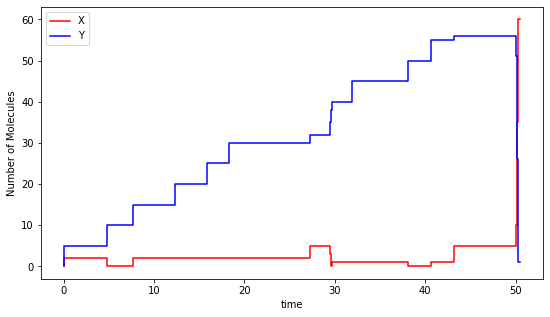

In [12]:
# Simulating the given system of chemical equations using Gillespie algorithm
initial_X = 0
initial_Y = 0
t = 0
k1 = 1
k2 = 2
k3 = 0.02
k4 = 0.04
graph_data = gillespie(initial_X, initial_Y, t, k1, k2, k3, k4)

t = [i[0] for i in graph_data]
x = [i[1] for i in graph_data]
y = [i[2] for i in graph_data]

# Plotting a step graph for number of molecules vs time
fig, ax = plt.subplots(figsize=(9,5))
ax.step(t,x,'r', label='X')
ax.step(t,y,'b', label='Y')
ax.set_xlabel('time')
ax.set_ylabel('Number of Molecules')
ax.legend()

This step graph describes the number of molecules of all the substances involved in the chemical equations with respect to time.
<br>
<br>
The given equations involve only 2 substances, X and Y. Initially, the number of molecules of both X and Y are 0.
<br>
As the reactions occur, the number of molecules of X increase and decrease periodically, but there is no monumental change. Towards the end, the number of molecules of X increases rapidly.
<br>
On the other hand, the number of molecules of Y increases periodically until it reaches a maximum. After reaching the maximum, it falls rapidly until the end.

Text(0, 0.5, 'Concentration Y')

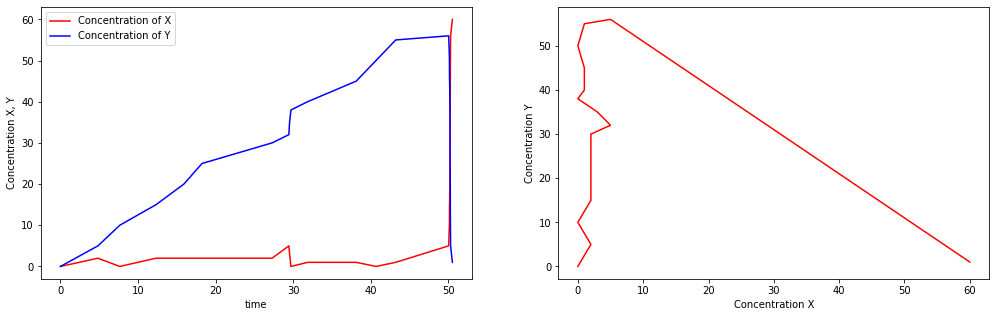

In [13]:
fig, ax = plt.subplots(ncols=2, figsize=(17,5))

# Plot concentration of X,Y graph vs time
ax[0].plot(t,x,'r', label='Concentration of X')
ax[0].plot(t,y,'b', label='Concentration of Y')
ax[0].set_xlabel('time')
ax[0].set_ylabel('Concentration X, Y')
ax[0].legend()

# Plotting a regular graph for number of molecules of X and Y vs time
ax[1].plot(x,y,'r')
ax[1].set_xlabel('Concentration X')
ax[1].set_ylabel('Concentration Y')

The Gillespie algorithm is quite efficient. It provides the best approximation for the dynamics of a system of chemical equations and is often used to check the accuracy of ODEs.
<br>
As can be seen from the graphs above, the graphs describing the dynamics obtained using the Gillespie algorithm are quite similar to the ones previously obtained by solving the differential equations.